In [1]:
# The code was removed by Watson Studio for sharing.

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
df_eq1.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [3]:
df_eq1 = df_eq1.drop(columns={'Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance','Horizontal Error'})

In [4]:
df_eq1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


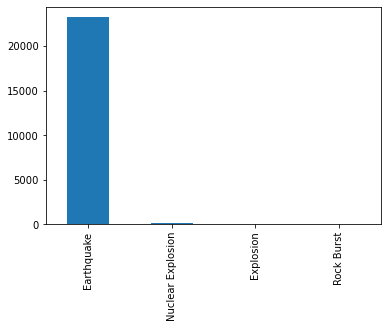

In [5]:
df_eq1['Type'].value_counts().plot(kind='bar')

In [39]:
df_eq1['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [40]:
df_eq1['Magnitude Type'].value_counts()

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64

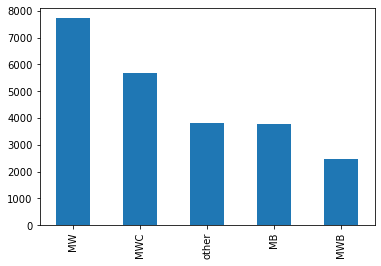

In [43]:
df_eq1['Magnitude Type'] = df_eq1['Magnitude Type'].str.replace('MH', 'other').str.replace('MD', 'other').str.replace('MWR','other').str.replace('ML', 'other').str.replace('MS', 'other').str.replace('MWW', 'other')
df_eq1['Magnitude Type'].value_counts().plot(kind='bar')

In [6]:
df_eq1['Source'].value_counts()

US           20630
ISCGEM        2460
ISCGEMSUP      120
CI              61
GCMT            55
NC              51
AK              12
OFFICIAL         8
UW               6
NN               4
ATLAS            3
SE               1
PR               1
Name: Source, dtype: int64

In [7]:
df_eq1['Source'] = df_eq1['Source'].str.replace('PR', 'other').str.replace('SE', 'other').str.replace('ATLAS','other').str.replace('NN', 'other').str.replace('UW', 'other').str.replace('OFFICIAL', 'other').str.replace('AK', 'other').str.replace('NC','other').str.replace('GCMT', 'other').str.replace('CI', 'other').str.replace('ISCGEMSUP', 'other')

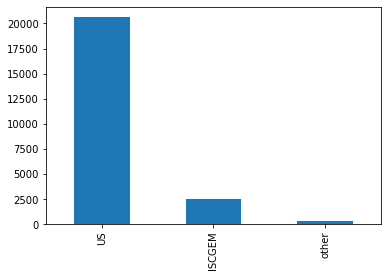

In [8]:
df_eq1['Source'].value_counts().plot(kind="bar")

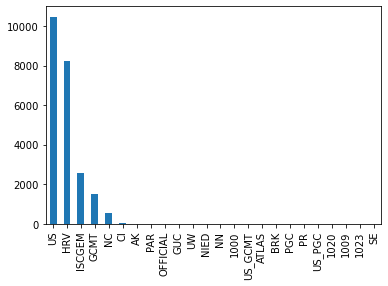

In [32]:
df_eq1['Magnitude Source'].value_counts().plot(kind='bar')

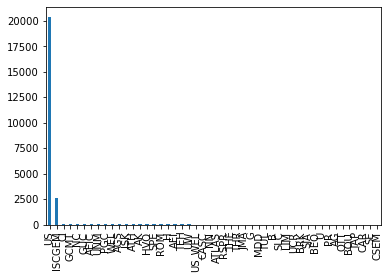

In [36]:
df_eq1['Location Source'].value_counts().plot(kind='bar')

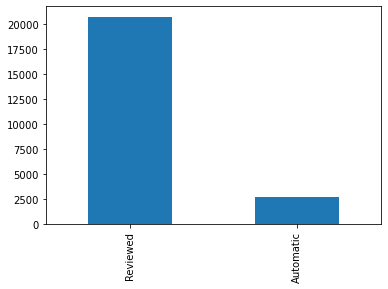

In [38]:
df_eq1['Status'].value_counts().plot(kind='bar')

In [28]:
categorical_data = df_eq1[['Type','Magnitude Type','Source','Location Source', 'Magnitude Source','Status']]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


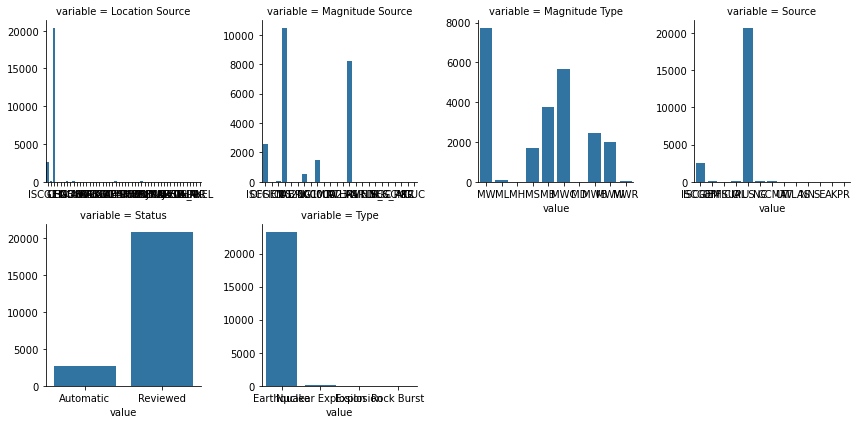

In [30]:
f = pd.melt(df_eq1, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g= g.map(sns.countplot, 'value', )